In [5]:
import tensorflow as tf
from tensorflow.keras import models,layers
import matplotlib.pyplot as plt


In [6]:
IMAGE_SIZE=256
BATCH_SIZE=32
CHANNELS=3
EPOCHS=8

In [7]:
dataset=tf.keras.preprocessing.image_dataset_from_directory(
"PlantVillage",
    shuffle=True,
    image_size=(IMAGE_SIZE,IMAGE_SIZE),
    batch_size=BATCH_SIZE
)

Found 2152 files belonging to 3 classes.


In [8]:
class_names=dataset.class_names
class_names

['Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy']

In [9]:
len(dataset)

68

In [10]:
for image_batch,label_batch in dataset.take(1):
    print(image_batch.shape)
    print(label_batch.numpy())

(32, 256, 256, 3)
[0 0 1 0 0 1 0 2 0 0 1 0 2 1 1 0 0 1 1 0 0 1 0 1 1 1 1 1 0 2 0 1]


In [11]:
#80%=training
#20%= 10% validation,10% testing

In [12]:
train_size=0.8
len(dataset)*train_size

54.400000000000006

In [13]:
train_ds=dataset.take(54)
len(train_ds)

54

In [14]:
test_ds=dataset.skip(54)
len(test_ds)

14

In [15]:
val_size=0.1
len(dataset)*val_size

6.800000000000001

In [16]:
val_ds=test_ds.take(6)
len(val_ds)

6

In [17]:
test_ds=test_ds.skip(6)
len(test_ds)

8

In [18]:
def get_dataset_partitions_tf(ds,train_split=0.8,val_split=0.1,test_split=0.1, shuffle=True,shuffle_size=10000):
    ds_size=len(ds)
    
    if shuffle:
        ds=ds.shuffle(shuffle_size,seed=12)
    train_size=int(train_split*ds_size)
    val_size=int(val_split*ds_size)
    
    train_ds=ds.take(train_size)
    val_ds=ds.skip(train_size).take(val_size)
    test_ds=ds.skip(train_size).skip(val_size)
    return train_ds,val_ds,test_ds

In [19]:
train_ds,val_ds,test_ds=get_dataset_partitions_tf(dataset)

In [20]:
len(train_ds)

54

In [21]:
len(val_ds)

6

In [22]:
len(test_ds)

8

In [23]:
train_ds=train_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
val_ds=val_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
test_ds=test_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)

In [24]:
resize_and_rescale=tf.keras.Sequential([
    
    layers.experimental.preprocessing.Resizing(IMAGE_SIZE,IMAGE_SIZE),
    layers.experimental.preprocessing.Rescaling(1.0/255)
])

In [25]:
data_augumentation=tf.keras.Sequential([
    layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
   
])

In [26]:
input_shape=(BATCH_SIZE,IMAGE_SIZE,IMAGE_SIZE,CHANNELS)
n_classes=3
model=models.Sequential([
    resize_and_rescale,
    data_augumentation,
    layers.Conv2D(32,(3,3),activation='relu',input_shape=input_shape),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(64,activation='relu'),
    layers.Dense(n_classes,activation='softmax'),
    
    
])
model.build(input_shape=input_shape)

In [27]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (32, 256, 256, 3)         0         
                                                                 
 sequential_1 (Sequential)   (32, 256, 256, 3)         0         
                                                                 
 conv2d (Conv2D)             (32, 254, 254, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (32, 127, 127, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (32, 125, 125, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (32, 62, 62, 64)         0         
 2D)                                                  

In [28]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)

In [25]:
model.fit(
    train_ds,
    batch_size=BATCH_SIZE,\
    validation_data=val_ds,
    verbose=1,
    epochs=EPOCHS
)

Epoch 1/8
54/54 [==============================] - 474s 8s/step - loss: 0.9119 - accuracy: 0.4630 - val_loss: 0.8922 - val_accuracy: 0.4896
Epoch 2/8
54/54 [==============================] - 623s 12s/step - loss: 0.8574 - accuracy: 0.5336 - val_loss: 0.7922 - val_accuracy: 0.5833
Epoch 3/8
54/54 [==============================] - 346s 6s/step - loss: 0.6297 - accuracy: 0.7141 - val_loss: 0.4622 - val_accuracy: 0.8021
Epoch 4/8
54/54 [==============================] - 565s 10s/step - loss: 0.6674 - accuracy: 0.7124 - val_loss: 0.5178 - val_accuracy: 0.7969
Epoch 5/8
54/54 [==============================] - 591s 11s/step - loss: 0.3994 - accuracy: 0.8380 - val_loss: 0.3507 - val_accuracy: 0.8750
Epoch 6/8
54/54 [==============================] - 477s 9s/step - loss: 0.3273 - accuracy: 0.8646 - val_loss: 0.3432 - val_accuracy: 0.8542
Epoch 7/8
54/54 [==============================] - 503s 9s/step - loss: 0.2859 - accuracy: 0.8854 - val_loss: 0.2925 - val_accuracy: 0.9062
Epoch 8/8
54/54 [

In [29]:
scores=model.evaluate(test_ds)

8/8 [==============================] - 105s 1s/step - loss: 1.0872 - accuracy: 0.4102


First image to predict
Actual Label: Potato___Early_blight
1/1 [==============================] - 2s 2s/step
Predicted Label: Potato___Late_blight


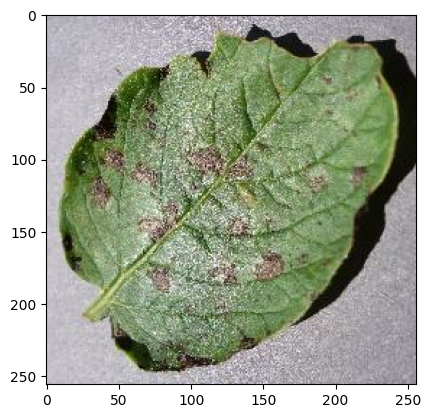

In [30]:
import numpy as np
for images_batch,labels_batch in test_ds.take(1):
    
   first_image=images_batch[0].numpy().astype("uint8")
   print("First image to predict")
   plt.imshow(first_image)
   print("Actual Label:",class_names[labels_batch[0].numpy()])
    
   batch_prediction=model.predict(images_batch)
   print("Predicted Label:",class_names[np.argmax(batch_prediction[0])])

In [32]:
def predict(model,img):
    img_array=tf.keras.preprocessing.image.img_to_array(images[i].numpy())
    img_array=tf.expand_dims(img_array,0)
    predictions=model.predict(img_array)
    predicted_class=class_names[np.argmax(predictions[0])]
    confidence=round(100*(np.max(predictions[0])),2)
    return predicted_class,confidence

1/1 [==============================] - 0s 78ms/step


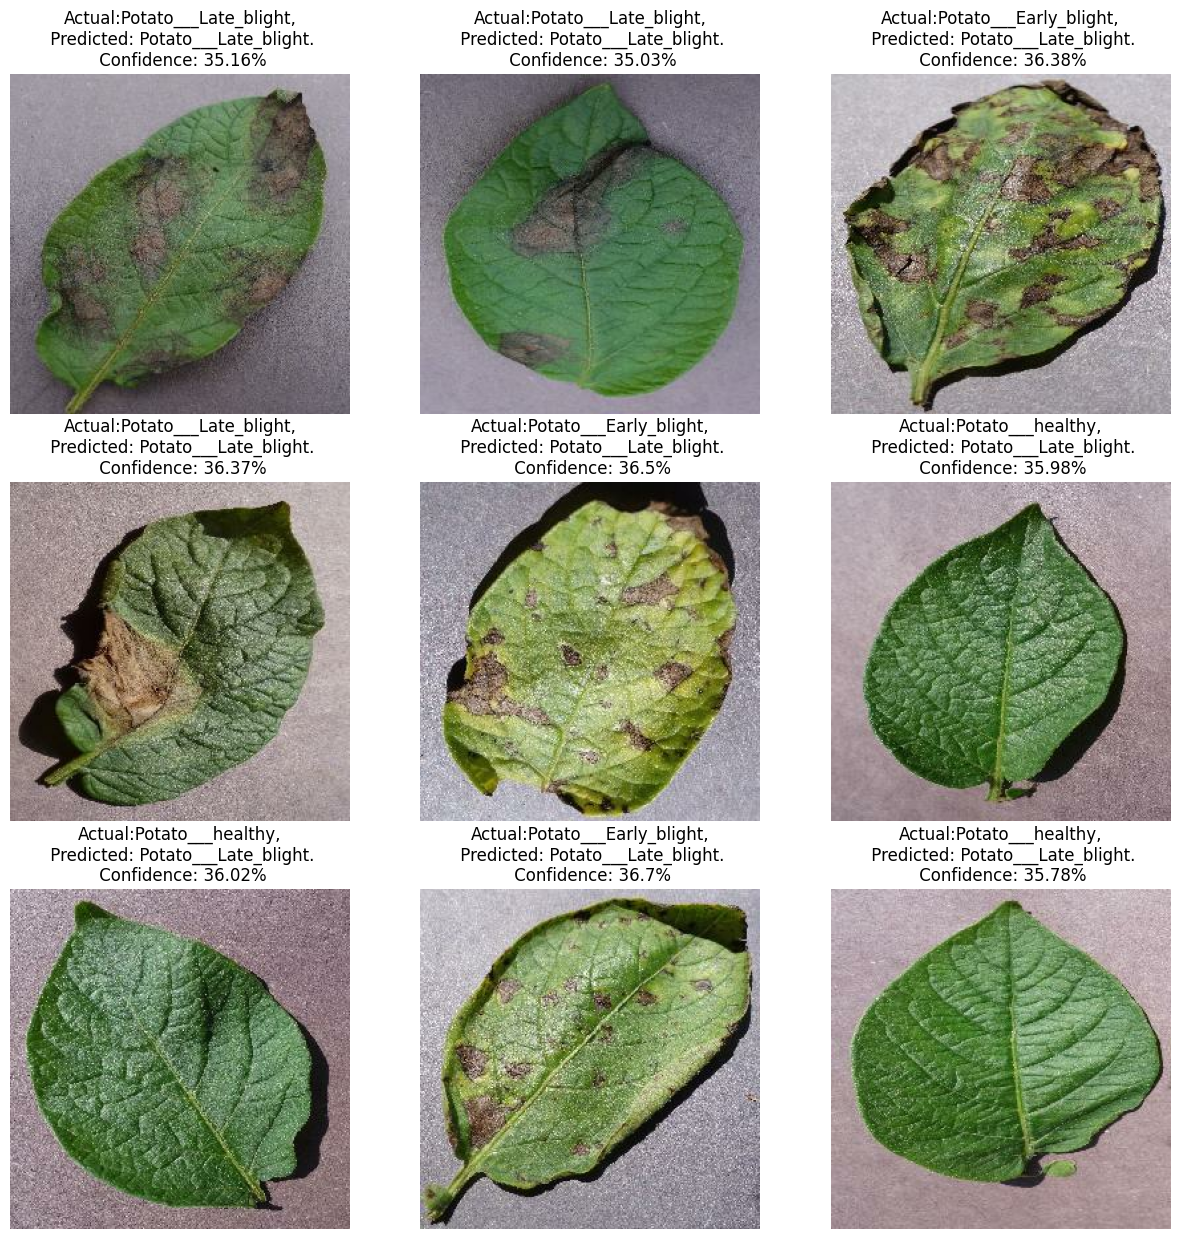

In [33]:
plt.figure(figsize=(15,15))
for images,labels in test_ds.take(1):
    for i in range(9):
        ax=plt.subplot(3,3,i+1)
        plt.imshow(images[i].numpy().astype("uint8"))
        predicted_class,confidence=predict(model,images[i].numpy())
        
        actual_class=class_names[labels[i]]
        plt.title(f"Actual:{actual_class},\n Predicted: {predicted_class}.\n Confidence: {confidence}%")
        plt.axis("off")